## 13. This question should be answered using the Weekly data set, which is part of the ISLR2 package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.
### (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?
### (b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?
### (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.
### (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).


### Overview
In this Weakly Dataset we will be analyzing Weekly percentage returns for the S&P 500 stock index between 1990 and 2010. We will begin by studying all the features, checking the missing values, performing exploratory Data Analysis. Then, we will be building a Logistic Regression Model where Direction will be our response variable and all five Lag variables and volume variable will be our will be our predictors. We will be computing confusion matrix and overall fraction of correct predictions and explain it. We will be building Logistic Regression model again where our training data will be from year 1990 to year 2008 with Lag2 as the predictor variable and Volume as the response. We will be testing our New model on our data from 2009 to 2010.

### Logistic Regression:
* Logistic Regression is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds. 
* Logistic Regression is given by :
$$ ln(\frac{pi}{(1-pi)}) = \beta0 + \beta1*X_1 + \beta2*X_2  … + B_k*K_k $$

[Source](https://www.ibm.com/topics/logistic-regression)

### Understanding the Dataset: A data frame with 1089 observations on the following 9 variables.

Year

    The year that the observation was recorded
Lag1

    Percentage return for previous week
Lag2

    Percentage return for 2 weeks previous
Lag3

    Percentage return for 3 weeks previous
Lag4

    Percentage return for 4 weeks previous
Lag5

    Percentage return for 5 weeks previous
Volume

    Volume of shares traded (average number of daily shares traded in billions)
Today

    Percentage return for this week
Direction

    A factor with levels Down and Up indicating whether the market had a positive or negative return on a given week


### Importing Libraries
These libraries are important for our model and we will be using this libraries through out our analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pylab as pl

### Loading the Weekly Dataset

In [2]:
weekly_data = pd.read_csv("Weekly.csv")

### First 5 values of weekly_data

In [3]:
weekly_data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


### Data type of every variable 

In [4]:
weekly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


### Columns in Weekly Dataset
* These helps us in understanding the columns we are dealing with.

In [5]:
weekly_data.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

### Checking for missing Values

In [6]:
weekly_data.isnull().sum()

Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64

### Shape of Weekly Data

In [7]:
weekly_data.shape

(1089, 9)

### Summary/Descriptive Statistics of Weekly Data
* We can observe the count, mean, Standard Deviation, minimum value, maximum value, Quantile Values.

In [8]:
weekly_data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


### There are two types of direction in the weekly dataset
* Direction is our Response Variable.
* It contains two values ['Down', 'Up']

In [9]:
weekly_data['Direction'].unique()

array(['Down', 'Up'], dtype=object)

### The data looks balanced based on direction.

In [10]:
weekly_data.groupby('Direction').size()

Direction
Down    484
Up      605
dtype: int64

We can observe that Direction has 484 rows with value `Down` and 605 rows with value `Up`

### Countplot to observe the data

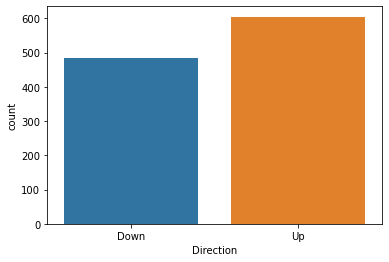

In [11]:
sns.countplot(x='Direction', data = weekly_data ,label='Count')
plt.show();

### Box plot for each numeric variable to observe clear idea of distribution of input variables

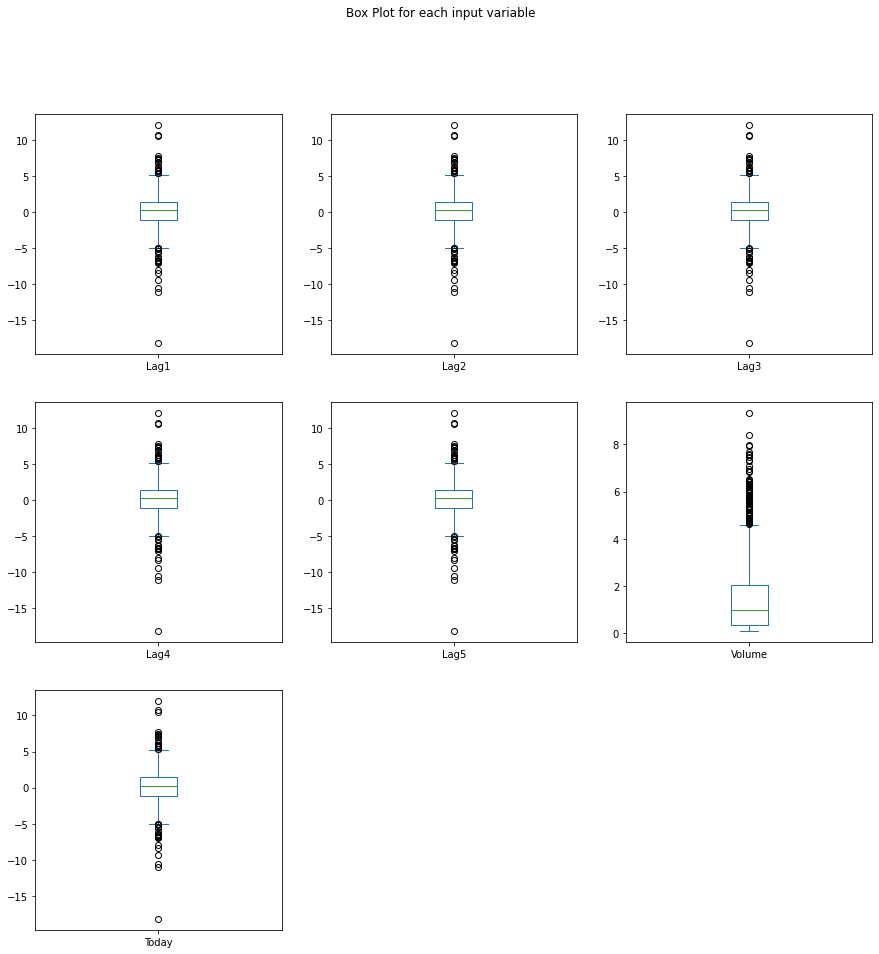

In [12]:
weekly_data.drop(labels=['Direction','Year'],axis=1).plot(kind='box',subplots=True,
                        layout=(3,3), sharex=False,sharey=False, figsize=(15,15),title="Box Plot for each input variable")
plt.savefig('Weekly_Data_Box')
plt.show()

### In this box plot we can observe that almost all the variables have Outliers and look Uniformly distributed except the Box Plot of Volume, It does not look uniformly distributed and looks like data is clustered on one side.

### Distribution of Data based on Histogram

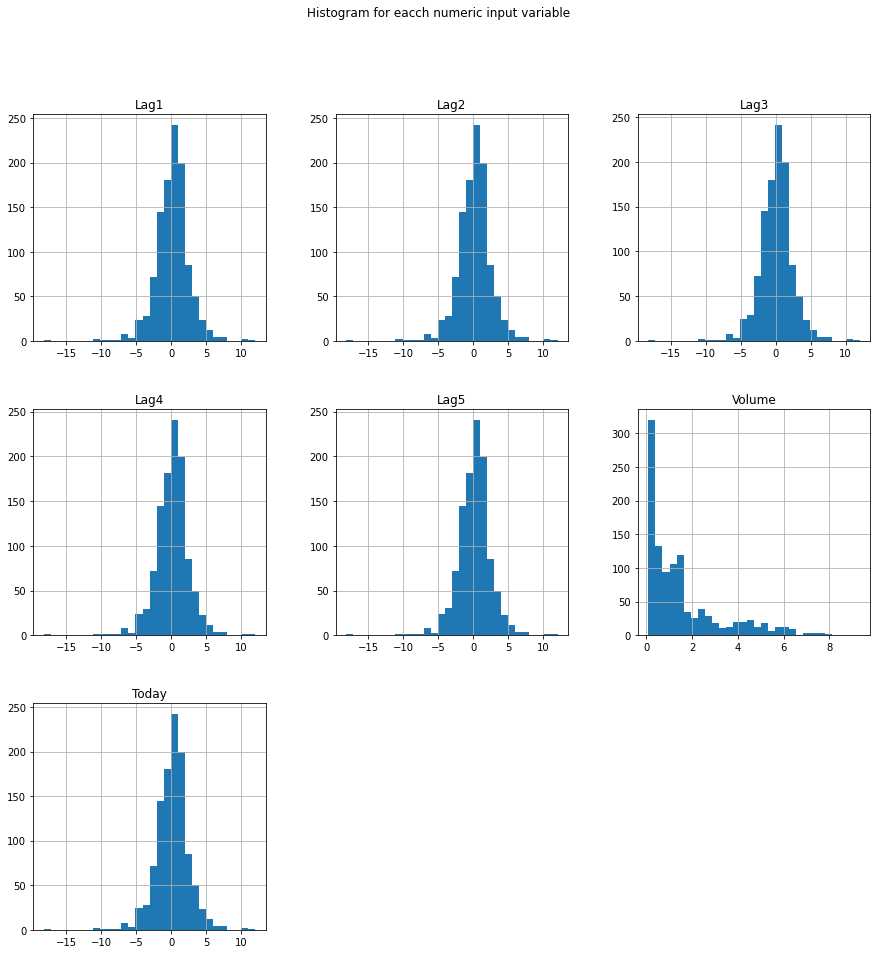

In [13]:
weekly_data.drop(labels=['Direction','Year'],axis=1).hist(bins=30, figsize=(15,15))
pl.suptitle("Histogram for eacch numeric input variable")
plt.savefig("Weekly_Data_Hist")
plt.show();

### All variables look evenly distrubuted but the Volume variable follows Right Skewed Distribution as most of its Data get clustered on the left.

### Some variables may be Correlated

In [14]:
weekly_data.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


* We can observe high Correlation between Volume and Year.
* Except these two there isn't much correlation between any of the variables.

### Heatmap to observe Correlation between variables

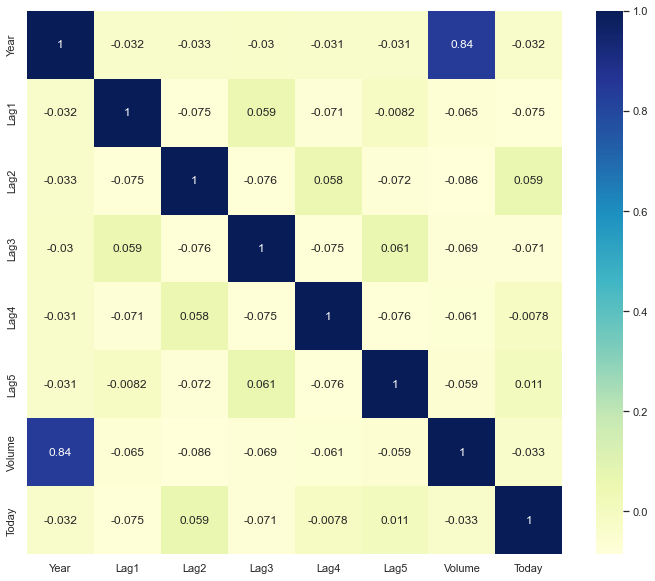

In [15]:
sns.set(rc={'figure.figsize': (12,10)})
sns.heatmap(weekly_data.corr(), cmap="YlGnBu", annot=True)
plt.show();

### Pairplot to show relationship between variables

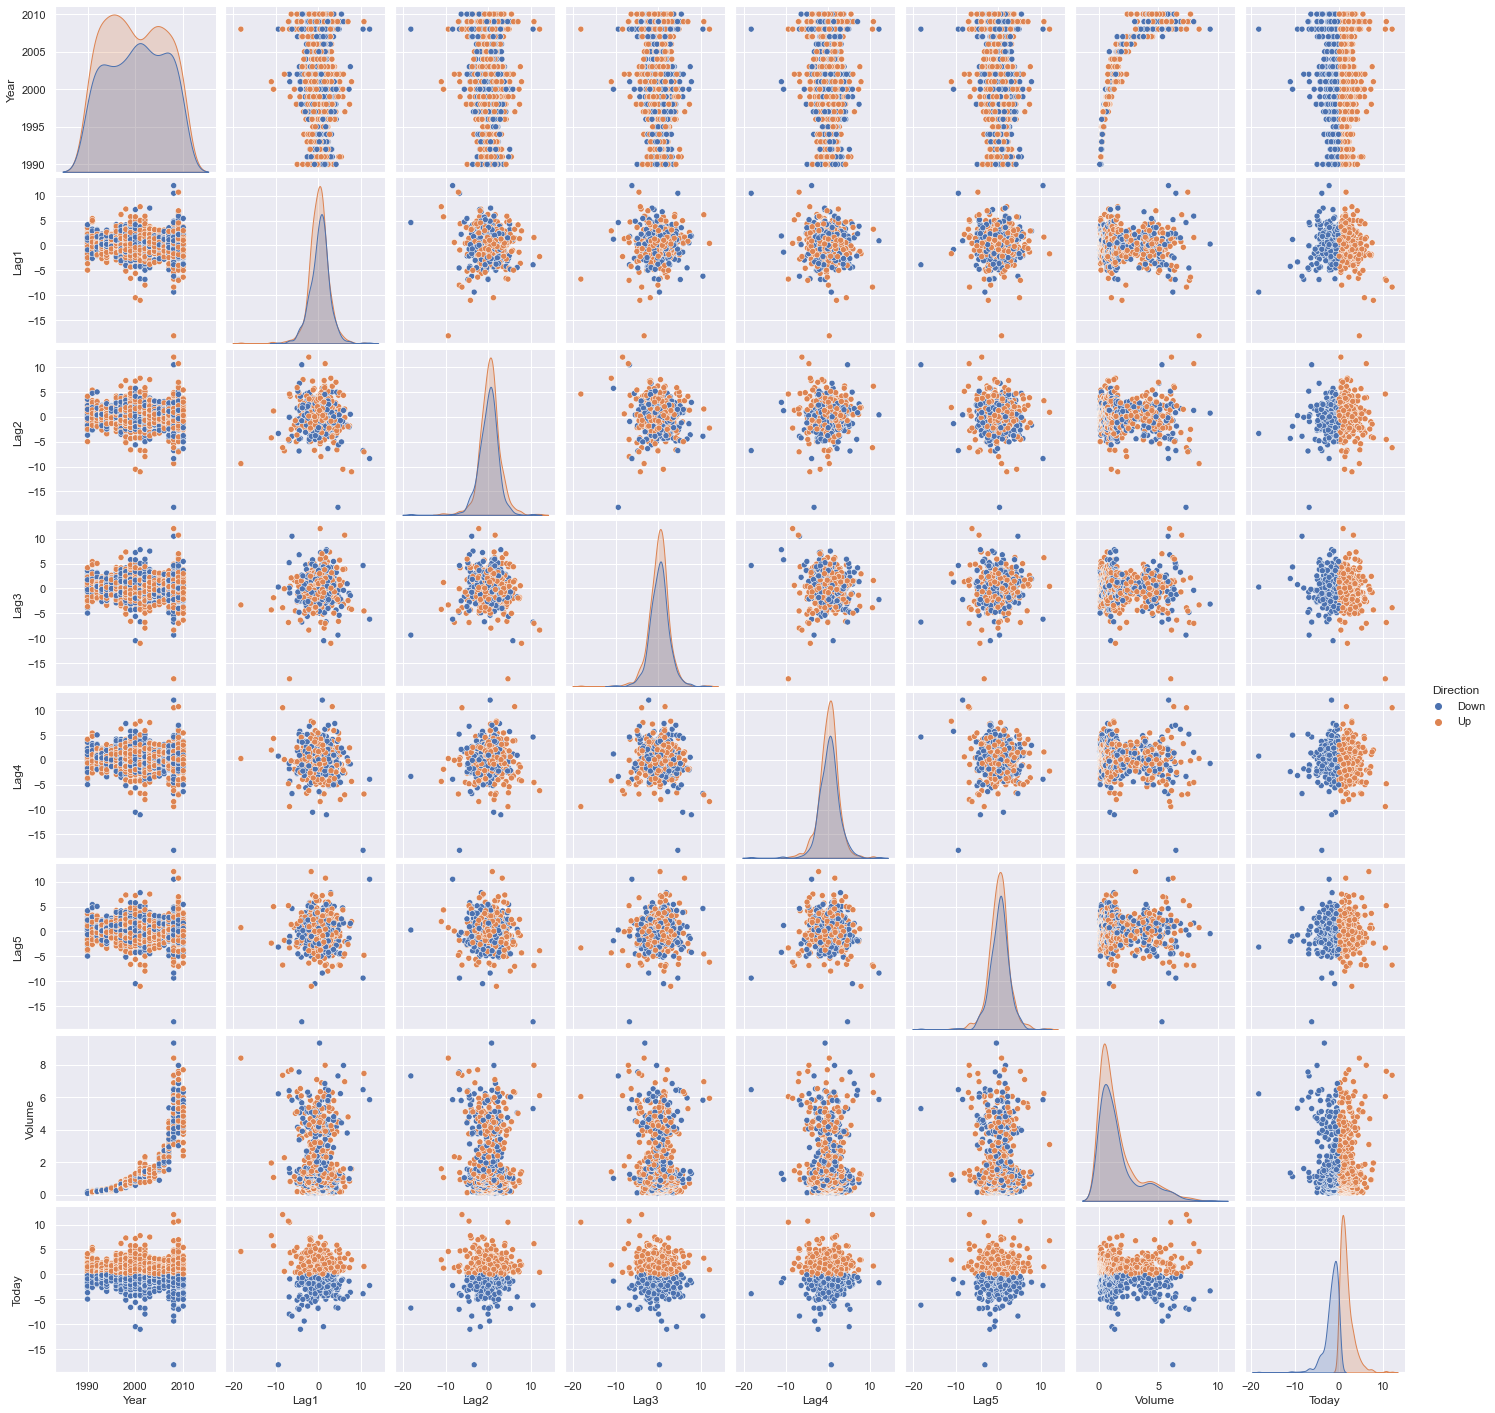

In [16]:
sns.pairplot(weekly_data,hue='Direction')
plt.savefig("Weekly_Data_pairplot")
plt.show();

### If we observe the Correlation Matrix, Heatmap and pairplot we can notice that there isn't much of an Correlation between the variables. Almost all the plot looks scattered in the mid region where Blue Color represents Direction UP and Orange Color represents Direction Down.

# Answer 13(a) : On the basis of Numerical summary and Graphical summary, the correlation between variables is very low however there's high correlation between volume and year.

### Replacing Down with 0 and Up with 1

In [17]:
weekly_data = weekly_data.replace({'Direction' : {'Down':0,'Up':1}})

In [18]:
weekly_data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


# Answer 13(b)

### Fit the Logistic Regression Model 

In [19]:
model = smf.logit('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data= weekly_data).fit()


Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


In [20]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sun, 16 Oct 2022   Pseudo R-squ.:                0.006580
Time:                        21:49:18   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.0

### Values in the Coefficient column tells the average change in the log odds of Direction going UP or DOWN.
* Each Lag 1 (Percentage return for previous week) is associated with an average increase of 0.0413 in the log odds of percentage return going UP.
* Each Lag 2 (Percentage return for 2 weeks) is associated with an average decrease of -0.0584 in the log odds of percentage return going UP.
* Each Lag 3 (Percentage return for 3 weeks) is associated with an average increase of 0.0161 in the log odds of percentage return going UP.
* Each Lag 4 (Percentage return for 4 weeks) is associated with an average increase of 0.0278 in the log odds of percentage return going UP.
* Each Lag 5 (Percentage return for 5 weeks) is associated with an average increase of 0.0145 in the log odds of percentage return going UP.
* Volume is associated with an average increase of 0.0227 in the log odds of percentage return going UP.

# Answer 13(b)
### p-Values for each Variable
* p-Values of `Lag 1 , Lag 3, Lag 4, Lag 5 and Volume` is 0.118, 0.547, 0.294, 0.583 and 0.538 respectively. Since the p-Value is not less that 0.05, it means there is not a statistically significant relationship between these variables and `Direction` going UP or DOWN.
* __p-Value of `Lag 2` is 0.030 which is less than 0.05. It means that `Lag 2` is Statistically significant with whether the `direction` will go UP or DOWN.__

### Pseudo R-Squared
* Pseudo R-Squared is calculated as the ratio of the maximized log-likelihood function of the null model to the full model.
* Pseudo R-squared is generally ranges between 0 and 1, with higher values indicating a better model fit.
* Here Pseudo R-squared value is 0.006580 which is VERY VERY LOW and it means that this model is not doing a good job in predicting `Direction` Variable.

### LLR p-Value
* LLR p-Value can be considered as substitute to p-Value in Linear Regression Model. Here LLR p-Value is 0.1313 which is not good as it should be less than 0.05.

In [21]:
weekly_data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


In [22]:
X = weekly_data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = weekly_data['Direction']

### Apply Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Build Models
* Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X,y)

LogisticRegression()

### Classes_ defines the array of distinct values y takes. In this model we are performing binary Classification (i.e) It can be either 0 or 1.

In [25]:
logreg_model.classes_

array([0, 1], dtype=int64)

### Model Intercept and Model Coefficients

In [26]:
logreg_model.intercept_

array([0.69492375])

In [27]:
logreg_model.coef_

array([[-0.77836179,  1.10059478, -0.32215108, -0.4514055 , -0.27579037,
        -0.18515534]])

### Evaluate the Model
* predict_proba() : returns the matrix of probabilities that the predicted output is equal to zero or one.

In [28]:
y_pred_prob = logreg_model.predict_proba(X)

In [29]:
y_pred_prob

array([[0.40873288, 0.59126712],
       [0.4166053 , 0.5833947 ],
       [0.42166124, 0.57833876],
       ...,
       [0.43400587, 0.56599413],
       [0.45268113, 0.54731887],
       [0.46550628, 0.53449372]])

In [30]:
y_pred = logreg_model.predict(X)

In [31]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [32]:
print("Accuracy of Logistic Regression Model : {:.2f} %".format(logreg_model.score(X,y) * 100))

Accuracy of Logistic Regression Model : 55.83 %


### We can observe that the Accuracy of our model is just 55.83 %. This is because there isn't much Correlation among features.

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

### Classification Report

In [34]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.04      0.07       484
           1       0.56      0.97      0.71       605

    accuracy                           0.56      1089
   macro avg       0.55      0.51      0.39      1089
weighted avg       0.55      0.56      0.43      1089



### Here precision tells us the percentage of correct positive predictions relative to total positive predictions. Here weighted avg value of precision is 55%
### Recall tells us the Percentage of correct positive predictions relative to total actual positives. Here weighted avg value is 56%.
### F1 score is weighted harmonic mean of precision and recall. The closer to 1 the better the model. Here f1 Score of our model is 0.43.

# Answer 13(c)
### Confusion Matrix tells more about the accuracy of the model, In case of binary Classification, the confusion matrix shows the numbers of the following:
* True negatives in the upper-left position.
* False negatives in the lower-left position.
* False positives in the upper-right position.
* True positives in the lower-right position.

In [35]:
confusionmatrix = confusion_matrix(y,y_pred)

In [36]:
print(confusionmatrix)

[[ 19 465]
 [ 16 589]]


### True Negative value of 19: which means around 19 times real value said the percentage return would go `DOWN` and value predicted by model also said percentage return would go `DOWN`.
### True Positive value of 589 : which means around 589 times real value said percentage return would go `UP` and value predicted by model also said percentage return would go `UP`.
### False positive value of 465 : this is also called type 1 error. This is when model predicted the percentage return would go `DOWN` but in real the percentage return went `UP`.
### False negative value of 16 ; this is also called type 2 error. This is when model predicted percentage return would go `UP` but in real percentage return actually went `DOWN`.

### Heatmap of Confusion Matrix 

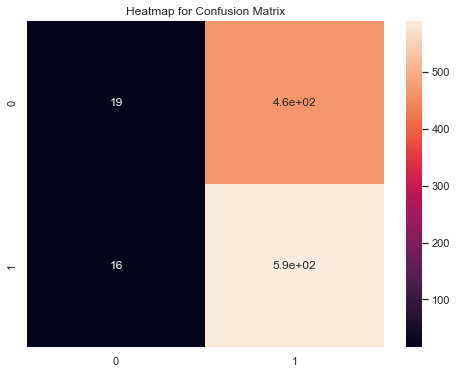

In [37]:
sns.set(rc={'figure.figsize': (8,6)})
sns.heatmap(confusionmatrix, annot=True)
plt.title("Heatmap for Confusion Matrix")
plt.savefig("Heatmap_for_confusion_matrix")
plt.show();

### Heatmap with percentage of Data present in each Quadrant

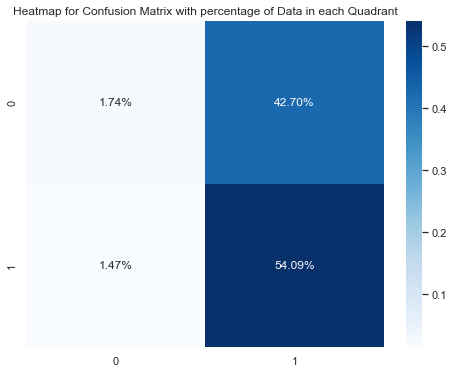

In [38]:
sns.set(rc={'figure.figsize': (8,6)})
sns.heatmap(confusionmatrix/np.sum(confusionmatrix), annot=True, fmt='.2%', cmap='Blues')
plt.title("Heatmap for Confusion Matrix with percentage of Data in each Quadrant")
plt.savefig("Heatmap_for_confusion_matrix_with_percentage_Data")
plt.show();

### Overall Fraction of Correct Predictions:
$ (True Positive + True Negative) / (True Positive + True negative + False Positive + False Negative) $

In [39]:
overall_accuracy = (19 + 589)/(19 + 465 + 16 + 589)
print("The Overall Accuracy based on confusion matrix is : {:.2f} %".format(overall_accuracy * 100))

The Overall Accuracy based on confusion matrix is : 55.83 %


In [40]:
weekly_data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


# Answer 13(d)

### Sorting Data based on year from 1990 to 2008 with Lag2 as the only predictor

In [41]:
weekly_data_train = weekly_data.loc[(weekly_data['Year'] >= 1990) & (weekly_data['Year'] < 2009)]

In [42]:
weekly_data_train = weekly_data_train.drop(['Lag1','Lag3','Lag4','Lag5','Volume','Today'],axis=1)

In [43]:
weekly_data_train

,Year,Lag2,Direction
0,1990,1.572,0
1,1990,0.816,0
2,1990,-0.270,1
3,1990,-2.576,1
4,1990,3.514,1
...,...,...,...
980,2008,-8.389,0
981,2008,12.026,1
982,2008,-2.251,1
983,2008,0.418,0


In [44]:
X = weekly_data_train[['Lag2']]
y = weekly_data_train['Direction']

### Build Model

In [45]:
from sklearn.linear_model import LogisticRegression
model_new = LogisticRegression()

In [46]:
model_new.fit(X,y)

LogisticRegression()

In [47]:
model_new.score(X,y)

0.5553299492385787

### Testing the model on data from Year 2009-2010

In [48]:
weekly_data_test = weekly_data.loc[weekly_data['Year'] >= 2009 ]

### Dropping Direction Column 

In [49]:
weekly_data_test.drop(['Direction'],axis=1)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
985,2009,6.760,-1.698,0.926,0.418,-2.251,3.793110,-4.448
986,2009,-4.448,6.760,-1.698,0.926,0.418,5.043904,-4.518
987,2009,-4.518,-4.448,6.760,-1.698,0.926,5.948758,-2.137
988,2009,-2.137,-4.518,-4.448,6.760,-1.698,6.129763,-0.730
989,2009,-0.730,-2.137,-4.518,-4.448,6.760,5.602004,5.173
...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034


### Testing the model

In [50]:
X_new = weekly_data_test[['Lag2']]
y_new = weekly_data_test['Direction']

In [51]:
y_pred_new = model_new.predict(X_new)

### Classification Report

In [52]:
print(classification_report(y_new, y_pred_new))

              precision    recall  f1-score   support

           0       0.64      0.21      0.32        43
           1       0.62      0.92      0.74        61

    accuracy                           0.62       104
   macro avg       0.63      0.56      0.53       104
weighted avg       0.63      0.62      0.57       104



### Here precision tells us the percentage of correct positive predictions relative to total positive predictions. Here weight avg precision is 63%.
### Recall tells us the Percentage of correct positive predictions relative to total actual positives. Here weight avg recall value is 62%.
### F1 score is weighted harmonic mean of precision and recall. The closer to 1 the better the model. F1 score of our model is 0.57.

### Confusion Matrix

In [53]:
confusionmatrix_new = confusion_matrix(y_new,y_pred_new)

In [54]:
print(confusionmatrix_new)

[[ 9 34]
 [ 5 56]]


### True Negative value of 9: which means around 9 times real value said the percentage return would go `DOWN` and value predicted by model also said percentage return would go `DOWN`.
### True Positive value of 56 : which means around 9 times real value said percentage return would go `UP` and value predicted by model also said percentage return would go `UP`.
### False positive value of 34 : this is also called type 1 error. This is when model predicted the percentage return would go `DOWN` but in real the percentage return went `UP`.
### False negative value of 55 ; this is also called type 2 error. This is when model predicted percentage return would go `UP` but in real percentage return actually went `DOWN`.

### Heamap for Overall Accuracy on Test Data based on Year 2009 - 2010

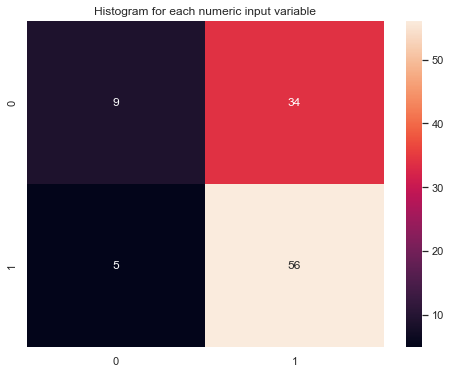

In [55]:
sns.heatmap(confusionmatrix_new, annot=True)
plt.title("Histogram for each numeric input variable")
plt.savefig("Heatmap for Overall Accuracy on Test Data based on Year 2009 - 2010")
plt.show();

### Heatmap with percentage of Data in each Quadrant

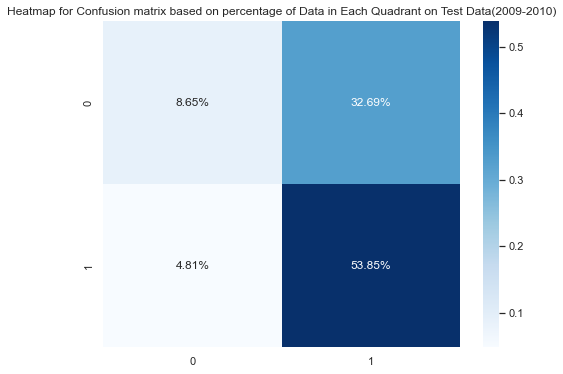

In [56]:
sns.heatmap(confusionmatrix_new/np.sum(confusionmatrix_new),annot=True, fmt='.2%',cmap='Blues')
plt.title("Heatmap for Confusion matrix based on percentage of Data in Each Quadrant on Test Data(2009-2010)")
plt.savefig("Confusion_matrix_on_TestData(2009-2010)(Percentage_data)")
plt.show()

### Overall Fraction of Correct Predictions:
$$ \frac{(True Positive + True Negative)}{(True Positive + True negative + False Positive + False Negative)} $$

In [57]:
overall_accuracy_test = (9 + 56)/(9 + 34 + 5 + 56)
print("Overall Accuracy on Test Data based of Year 2009 - 2010 : {:.2f} %".format(overall_accuracy_test * 100))

Overall Accuracy on Test Data based of Year 2009 - 2010 : 62.50 %


# Conclusion :
# Based on our observation we can conclude that there isn't much correlation between the variables and thus with the help of Logistic Regression model in Question (c) we can predict the data with the accuracy of 55.83% and with the help of a Logistic Regression model in Question (d) which takes only Lag2 as the predictor we can predict the data with the overall accuracy of 62.5%. (i.e) Our model is still incapable of predicting around 38 to 45 % of Data Points.